In [1]:
#
# Import Libraries
#

import pickle
from dotmap import DotMap
import os
import numpy as np
import pandas as pd
import sys
from functools import reduce
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots


utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from MyCorrelations import Xsplit, MyCorrelations
from pvalues_correlations import getH0, plotNullAlt, get_pvalues, graph_size, get_corrThr, adjust_pvalues

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\PESA_V2"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\PESA_V2"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2i.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\PESA_V2\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA_V2\myRData"

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t').set_index('Seqn')

In [5]:
ctype_omic = {
    'psk': ['qq', 'mm', 'qm'],
    # 'pc': ['qq', 'mm'],
    'rpc': ['qq', 'mm'],
    'cca': ['qm'],
    'rcca': ['qm']
}

In [6]:
#
# Calculate correlations  
#

corr = MyCorrelations(xq, xm, mdata)
corr.PSK(methods=['pearson', 'spearman', 'kendall'])
corr.gLasso(test=False)
#corr.PartialCorrelation()
corr.rCCA(rPath)
corr.CCA()

Start PSK
End PSK | 6608.29s
Start gLasso
omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  12s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   1s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   1s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   6s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   0s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   1s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   8s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.5min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  503s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.8min remaining: 13.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1133s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 20.5min remaining: 30.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 22.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2460s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 25.8min remaining: 38.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 27.6min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  4115s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.4min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  516s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.6min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1081s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 13.8min remaining: 20.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2002s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 21.4min remaining: 32.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 24.5min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  3472s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.2min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  393s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.4min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1069s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 11.3min remaining: 16.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  1857s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 15.1min remaining: 22.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  3119s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2017
Omic: qq | Subset: c | Alpha: 0.2277
Omic: qq | Subset: d | Alpha: 0.2125
Omic: mm | Subset: a | Alpha: 0.5399
Omic: mm | Subset: c | Alpha: 0.5935
Omic: mm | Subset: d | Alpha: 0.7115
End gLasso | 11181.77s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loadi

In [7]:
#
# Calculate Null Hypothesis Correlations
#

n = 2

corrSL = []
for xqsi in range(n):

    xqs = xq.copy()
    xms = xm.copy()

    _ = [np.random.shuffle(i) for i in xqs.to_numpy().T]
    _ = [np.random.shuffle(i) for i in xms.to_numpy().T]

    corrS = MyCorrelations(xqs, xms, mdata)
    corrS.PSK(methods=['pearson', 'spearman', 'kendall'])
    corrS.gLasso(test=False)
    #corrS.PartialCorrelation()
    corrS.rCCA(rPath)
    corrS.CCA()
    corrSL.append(corrS)

Start PSK
End PSK | 6791.64s
Start gLasso
omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.0s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  11s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   4s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   5s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 17.1min remaining: 25.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  1129s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 12.8min remaining: 19.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1898s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.1min remaining: 10.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2324s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.0min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2756s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.3min remaining: 24.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  993s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 13.5min remaining: 20.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1804s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.1min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2235s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2640s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.8min remaining: 25.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  1088s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 15.1min remaining: 22.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1997s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.8min remaining: 10.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2411s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2813s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.1717
Omic: qq | Subset: c | Alpha: 0.2672
Omic: qq | Subset: d | Alpha: 0.265
Omic: mm | Subset: a | Alpha: 0.2552
Omic: mm | Subset: c | Alpha: 0.4188
Omic: mm | Subset: d | Alpha: 0.3968
End gLasso | 8329.7s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   7s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  4 out of 4:   4s
ss: d


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   5s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.1min remaining: 24.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  1026s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 14.1min remaining: 21.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1876s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.4min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2262s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.4min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2649s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 14.7min remaining: 22.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  919s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 13.1min remaining: 19.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1704s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.6min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2104s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.4min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.5min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2491s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 14.8min remaining: 22.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  956s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 14.0min remaining: 21.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  1800s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.2min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  2183s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.1min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  2569s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.1873
Omic: qq | Subset: c | Alpha: 0.2636
Omic: qq | Subset: d | Alpha: 0.3022
Omic: mm | Subset: a | Alpha: 0.235
Omic: mm | Subset: c | Alpha: 0.4091
Omic: mm | Subset: d | Alpha: 0.4057
End gLasso | 7825.9s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading 

In [8]:
# Write correlations

f = open('corr.pkl', 'wb')
pickle.dump([corr, corrSL], f)
f.close()

In [9]:
# Read correlations

f = open('corr.pkl', 'rb')
corr, corrSL = pickle.load(f)
f.close()

In [10]:
#
# Get null hypothesis
#

h0c = DotMap()

h0c.psk = getH0(corrSL, 'psk', ['qq', 'mm', 'qm'], ['a', 'c', 'd', 'dc'])
h0c.rpc = getH0(corrSL, 'rpc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
#h0c.pc = getH0(corrSL, 'pc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
h0c.rcca = getH0(corrSL, 'rcca', ['qm'], ['a', 'c', 'd', 'dc'])
h0c.cca = getH0(corrSL, 'cca', ['qm'], ['a', 'c', 'd', 'dc'])

In [11]:
#
# Plot correlations Null vs Alternative
#

files = glob.glob(r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\PESA\plots\*')
for f in files:
    os.remove(f)

plotNullAlt(corr, h0c, ctype_omic, absolute=False, size=1*10**5)

In [12]:
#
# Calculate pvalues
#

pvals = get_pvalues(corr, h0c, ctype_omic, size=10**5)

In [13]:
adpvals = adjust_pvalues(pvals, ctype_omic)

In [14]:
# Write correlations

f = open('pvals.pkl', 'wb')
pickle.dump((pvals, adpvals), f)
f.close()

In [15]:
# Read correlations

f = open('pvals.pkl', 'rb')
pvals, adpvals = pickle.load(f)
f.close()

In [16]:
#
# Get correlation threshold
#

pvalueThr = 0.01

In [17]:
#
# Graph size
# Applying adjusted pvalues

edges, nodes = graph_size(ctype_omic, adpvals, pvalueThr=pvalueThr)

In [18]:
edges

qq            mm          qm            
      psk   rpc     psk   rpc   psk cca    rcca
a   10153  1571  260660  6990  3278   0  116631
c    4373  1418  134492  4241   540   0   62147
d    5344  1693  141972  4135     0   0   75331
dc      0  2546       0  6134     0   0   46391

In [19]:
nodes

qq         mm         qm          
    psk  rpc   psk   rpc  psk cca  rcca
a   249  249  2062  2062  977   0  1880
c   249  249  2062  2062  305   0  1659
d   249  249  2062  2062    0   0  1638
dc    0  247     0  1241    0   0  1703

In [20]:
print('Graph Density | qq-rpc & mm-rpc & qm-rcca')
print()
print(f'Adjusted p-value: {pvalueThr}')
print()
print(f'qq: {round(100*2953/(xq.shape[1]*(xq.shape[1]-1)/2),2)}%')
print(f'mm: {round(100*2302/(xm.shape[1]*(xm.shape[1]-1)/2),2)}%')
print(f'qm: {round(100*40095/(xq.shape[1]*xm.shape[1]),2)}%')

Graph Density | qq-rpc & mm-rpc & qm-rcca

Adjusted p-value: 0.01

qq: 9.56%
mm: 0.11%
qm: 7.81%


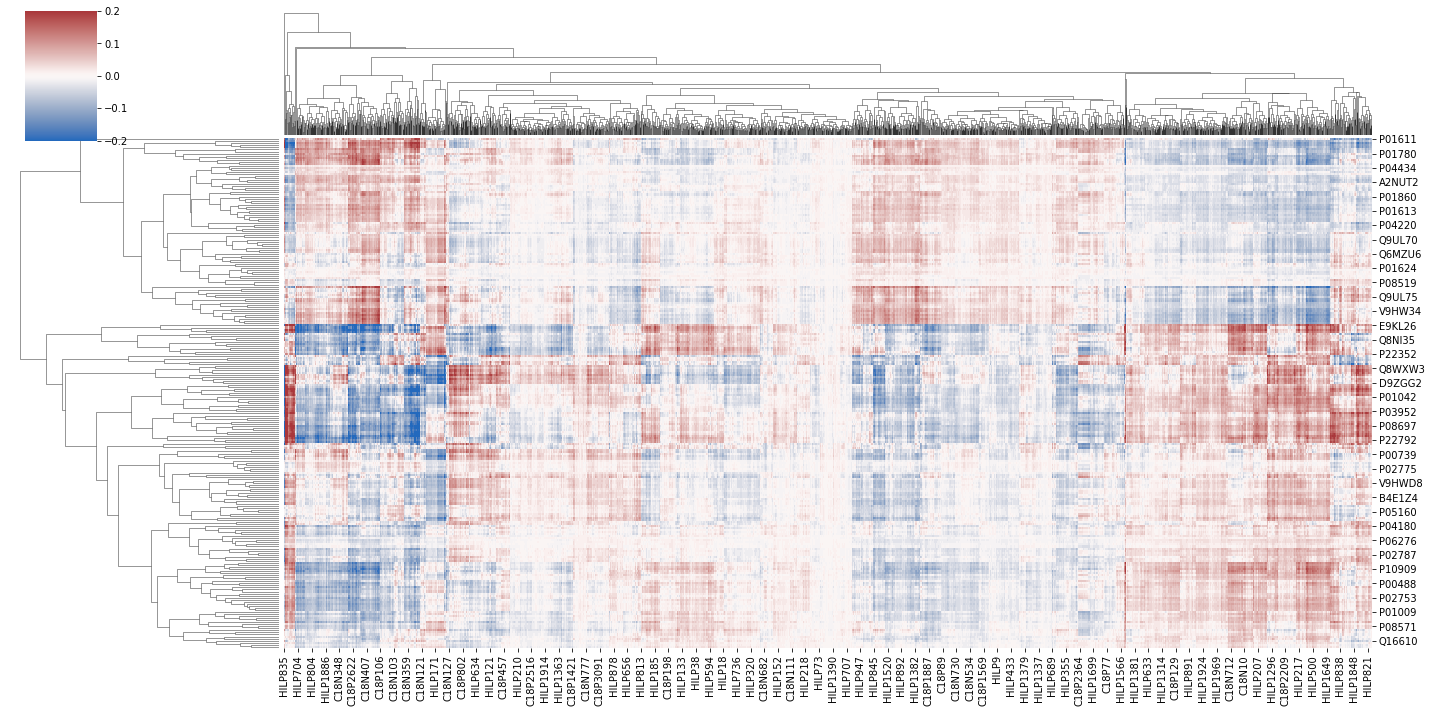

In [25]:
#
# Cluster Map
#

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


df = corr.rcca.qm.dc
hmap = sns.clustermap(
    round(df,2), 
    cmap='vlag', 
    annot=False, 
    figsize=(20,10), 
    metric='euclidean', method='average', vmin=-0.2, vmax=0.2)